In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Import the Chicago dataset
chicago = pd.read_csv(r"C:\Users\USER\Desktop\AltSchool Africa\Datasets\crime_data_chicago.csv")

In [3]:
chicago.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,6407111,HP485721,07/26/2008 02:30:00 PM,085XX S MUSKEGON AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,...,10.0,46.0,14,1196638.0,1848800.0,2008,02/28/2018 03:56:25 PM,41.739980,-87.555120,"(41.739979622, -87.555120042)"
1,1,11398199,JB372830,07/31/2018 10:57:00 AM,092XX S ELLIS AVE,143C,WEAPONS VIOLATION,UNLAWFUL POSS AMMUNITION,POOL ROOM,True,...,8.0,47.0,15,1184499.0,1843935.0,2018,08/07/2018 04:02:59 PM,41.726922,-87.599747,"(41.726922145, -87.599746995)"
2,2,5488785,HN308568,04/27/2007 10:30:00 AM,062XX N TRIPP AVE,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,True,...,39.0,12.0,05,1146911.0,1941022.0,2007,02/28/2018 03:56:25 PM,41.994138,-87.734959,"(41.994137622, -87.734959049)"
3,3,11389116,JB361368,07/23/2018 08:55:00 AM,0000X N KEELER AVE,0560,ASSAULT,SIMPLE,NURSING HOME/RETIREMENT HOME,False,...,28.0,26.0,08A,1148388.0,1899882.0,2018,07/30/2018 03:52:24 PM,41.881217,-87.730590,"(41.881217483, -87.730589961)"
4,4,12420431,JE297624,07/11/2021 06:40:00 AM,016XX W HARRISON ST,051A,ASSAULT,AGGRAVATED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),False,...,27.0,28.0,04A,1165430.0,1897441.0,2021,07/18/2021 04:56:02 PM,41.874174,-87.668082,"(41.874173691, -87.668082118)"


In [4]:
chicago.shape

(2278726, 23)

In [5]:
# Taking a 70% random sample from our Chicago dataset
chicago_df = chicago.sample(frac = 0.7, random_state= 1)

In [6]:
# Understanding our data set
# see the number of rows and columns
chicago_df.shape

(1595108, 23)

In [7]:
# drop redundant columns
chicago_df.drop(columns = ["Unnamed: 0","ID","Latitude","Longitude","X Coordinate","Y Coordinate"], axis =1, inplace = True)

In [8]:
chicago_df.reset_index()
chicago_df.head()

,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Updated On,Location
237896,HS401321,07/08/2010 11:38:00 PM,056XX S GREEN ST,141A,WEAPONS VIOLATION,UNLAWFUL USE HANDGUN,STREET,True,False,712,7.0,20.0,68.0,15,2010,02/10/2018 03:50:01 PM,"(41.79155006, -87.646300555)"
1801776,HH578795,08/13/2002 09:30:00 PM,077XX S RIDGELAND AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,414,4.0,8.0,43.0,14,2002,02/28/2018 03:56:25 PM,"(41.754268012, -87.582155675)"
1258135,HY460862,10/13/2015 07:30:00 PM,067XX S ARTESIAN AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,832,8.0,15.0,66.0,08B,2015,02/10/2018 03:50:01 PM,"(41.770962966, -87.684637876)"
2223942,HN595456,09/18/2007 01:56:00 AM,087XX S COMMERCIAL AVE,1220,DECEPTIVE PRACTICE,THEFT OF LOST/MISLAID PROP,SIDEWALK,True,False,423,4.0,10.0,46.0,11,2007,02/28/2018 03:56:25 PM,"(41.736664051, -87.551415568)"
2121997,HW173766,02/28/2013 02:00:00 PM,036XX N SOUTHPORT AVE,1152,DECEPTIVE PRACTICE,ILLEGAL USE CASH CARD,DRUG STORE,False,False,1923,19.0,44.0,6.0,11,2013,02/10/2018 03:50:01 PM,"(41.947857457, -87.664033932)"


In [9]:
chicago_df.dtypes

Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                 object
Year                      int64
Updated On               object
Location                 object
dtype: object

In [10]:
# Check for missing values 
chicago_df.isna().sum()

Case Number                  1
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description      2014
Arrest                       0
Domestic                     0
Beat                         0
District                     9
Ward                    129216
Community Area          128921
FBI Code                     0
Year                         0
Updated On                   0
Location                 16711
dtype: int64

In [11]:
# Check for duplicate rows
chicago_df.duplicated().sum()

6

In [12]:
chicago_df.loc[chicago_df.duplicated()]

,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Updated On,Location
498162,HV341781,06/19/2012 01:12:00 AM,012XX N MASON AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,2531,25.0,29.0,25.0,01A,2012,03/18/2019 04:08:09 PM,"(41.902618024, -87.774168158)"
2218947,HJ590004,08/27/2003 08:35:00 AM,039XX S WALLACE ST,0110,HOMICIDE,FIRST DEGREE MURDER,WAREHOUSE,True,False,925,9.0,11.0,61.0,01A,2003,03/18/2019 04:08:09 PM,"(41.822967958, -87.641048569)"
2150059,JA206252,03/30/2017 04:32:00 PM,027XX E 75TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,RESTAURANT,True,False,334,3.0,7.0,43.0,01A,2017,03/18/2019 04:08:09 PM,"(41.760080391, -87.558186925)"
1364693,G703238,11/23/2001 08:30:00 AM,112XX S GREEN STREET,0110,HOMICIDE,FIRST DEGREE MURDER,APARTMENT,False,False,2233,22.0,NaN,NaN,01A,2001,03/19/2019 04:11:22 PM,"(41.689771618, -87.643514659)"
126290,HR146859,01/31/2009 01:10:00 AM,039XX W ARGYLE ST,0110,HOMICIDE,FIRST DEGREE MURDER,APARTMENT,True,False,1712,17.0,39.0,14.0,01A,2009,03/19/2019 04:11:22 PM,"(41.971902506, -87.726290051)"
502351,HK172551,02/08/2004 11:44:00 PM,034XX W MADISON ST,0110,HOMICIDE,FIRST DEGREE MURDER,CHURCH,False,False,1123,11.0,28.0,27.0,01A,2004,03/19/2019 04:11:22 PM,"(41.880908996, -87.711842908)"


In [13]:
# Fnd duplicate case number
chicago_df.loc[chicago_df.duplicated(subset= ["Case Number"])]

,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Updated On,Location
1648799,JF259064,05/28/2022 05:33:00 PM,055XX S BISHOP ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,713,7.0,16.0,67.0,01A,2022,06/04/2022 04:49:12 PM,"(41.793200818, -87.660922087)"
1499444,G614514,10/13/2001 01:44:00 AM,107XX S PERRY AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,513,5.0,34.0,49.0,01A,2001,03/19/2019 04:11:22 PM,"(41.699035036, -87.625674408)"
767267,JB359724,07/21/2018 11:33:00 PM,031XX W FULTON BLVD,0110,HOMICIDE,FIRST DEGREE MURDER,PARK PROPERTY,False,False,1222,12.0,27.0,27.0,01A,2018,03/18/2019 04:08:09 PM,"(41.886444966, -87.704433324)"
498162,HV341781,06/19/2012 01:12:00 AM,012XX N MASON AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,2531,25.0,29.0,25.0,01A,2012,03/18/2019 04:08:09 PM,"(41.902618024, -87.774168158)"
238427,HS313197,05/18/2010 06:37:00 AM,031XX W 48TH PL,0110,HOMICIDE,FIRST DEGREE MURDER,AUTO,True,False,911,9.0,14.0,58.0,01A,2010,03/19/2019 04:11:22 PM,"(41.805185857, -87.702166016)"
1064264,HS638640,11/30/2010 12:55:00 AM,111XX S BELL AVE,0110,HOMICIDE,FIRST DEGREE MURDER,APARTMENT,True,True,2212,22.0,19.0,75.0,01A,2010,03/19/2019 04:11:22 PM,"(41.691515662, -87.677502582)"
718478,HV303630,05/25/2012 11:50:00 PM,065XX S KENWOOD AVE,0110,HOMICIDE,FIRST DEGREE MURDER,HOUSE,True,True,321,3.0,20.0,42.0,01A,2012,03/18/2019 04:08:09 PM,"(41.776070273, -87.592969398)"
862166,HJ309452,04/19/2003 04:35:00 AM,003XX E 51ST ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,232,2.0,3.0,40.0,01A,2003,03/19/2019 04:11:22 PM,"(41.802059097, -87.619047858)"
1743777,JD298408,07/15/2020 04:11:00 PM,069XX S THROOP ST,0110,HOMICIDE,FIRST DEGREE MURDER,AUTO,True,False,734,7.0,6.0,67.0,01A,2020,05/13/2021 04:59:17 PM,"(41.767960994, -87.656618275)"
1635303,HY259141,06/10/2015 12:01:00 AM,002XX W 107TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,AUTO,True,False,513,5.0,34.0,49.0,01A,2015,03/18/2019 04:08:09 PM,"(41.699802541, -87.629100771)"


In [14]:
chicago_df.dropna(subset =["Case Number"], inplace= True)

In [15]:
# confirm if truly duplicated rows exist using case number
chicago_df[chicago_df["Case Number"].str.contains("HK172551")]

,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Updated On,Location
74485,HK172551,02/08/2004 11:44:00 PM,034XX W MADISON ST,0110,HOMICIDE,FIRST DEGREE MURDER,CHURCH,False,False,1123,11.0,28.0,27.0,01A,2004,03/19/2019 04:11:22 PM,"(41.880908996, -87.711842908)"
502351,HK172551,02/08/2004 11:44:00 PM,034XX W MADISON ST,0110,HOMICIDE,FIRST DEGREE MURDER,CHURCH,False,False,1123,11.0,28.0,27.0,01A,2004,03/19/2019 04:11:22 PM,"(41.880908996, -87.711842908)"


In [16]:
# Exclude duplicate rows
chicago_df1 = chicago_df.loc[~chicago_df.duplicated(subset = ["Case Number"])].reset_index(drop = True)
chicago_df1.head()

,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Updated On,Location
0,HS401321,07/08/2010 11:38:00 PM,056XX S GREEN ST,141A,WEAPONS VIOLATION,UNLAWFUL USE HANDGUN,STREET,True,False,712,7.0,20.0,68.0,15,2010,02/10/2018 03:50:01 PM,"(41.79155006, -87.646300555)"
1,HH578795,08/13/2002 09:30:00 PM,077XX S RIDGELAND AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,414,4.0,8.0,43.0,14,2002,02/28/2018 03:56:25 PM,"(41.754268012, -87.582155675)"
2,HY460862,10/13/2015 07:30:00 PM,067XX S ARTESIAN AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,832,8.0,15.0,66.0,08B,2015,02/10/2018 03:50:01 PM,"(41.770962966, -87.684637876)"
3,HN595456,09/18/2007 01:56:00 AM,087XX S COMMERCIAL AVE,1220,DECEPTIVE PRACTICE,THEFT OF LOST/MISLAID PROP,SIDEWALK,True,False,423,4.0,10.0,46.0,11,2007,02/28/2018 03:56:25 PM,"(41.736664051, -87.551415568)"
4,HW173766,02/28/2013 02:00:00 PM,036XX N SOUTHPORT AVE,1152,DECEPTIVE PRACTICE,ILLEGAL USE CASH CARD,DRUG STORE,False,False,1923,19.0,44.0,6.0,11,2013,02/10/2018 03:50:01 PM,"(41.947857457, -87.664033932)"


In [17]:
# Drop missing values
chicago_df1.dropna(inplace= True)

In [18]:
chicago_df1.shape

(1449506, 17)

In [19]:
chicago_df1.isna().sum()

Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
Year                    0
Updated On              0
Location                0
dtype: int64

In [20]:
# Feature Understanding and Relationships

In [21]:
# Which year has the highest number of crimes
chicago_df1['Year'].value_counts().idxmax()

2003

In [22]:
# What are the most common types of crime in Chicago?
crime_by_type = chicago_df1.groupby(['Primary Type']).size().sort_values(ascending=False)
crime_by_type

Primary Type
THEFT                                305615
BATTERY                              266905
CRIMINAL DAMAGE                      166366
NARCOTICS                            139475
ASSAULT                               94593
OTHER OFFENSE                         90028
BURGLARY                              80881
MOTOR VEHICLE THEFT                   66986
DECEPTIVE PRACTICE                    61576
ROBBERY                               54753
CRIMINAL TRESPASS                     40577
WEAPONS VIOLATION                     19962
PROSTITUTION                          12776
OFFENSE INVOLVING CHILDREN            10091
PUBLIC PEACE VIOLATION                10084
SEX OFFENSE                            5253
CRIM SEXUAL ASSAULT                    5067
INTERFERENCE WITH PUBLIC OFFICER       3676
GAMBLING                               2794
LIQUOR LAW VIOLATION                   2710
HOMICIDE                               2435
ARSON                                  2419
KIDNAPPING         

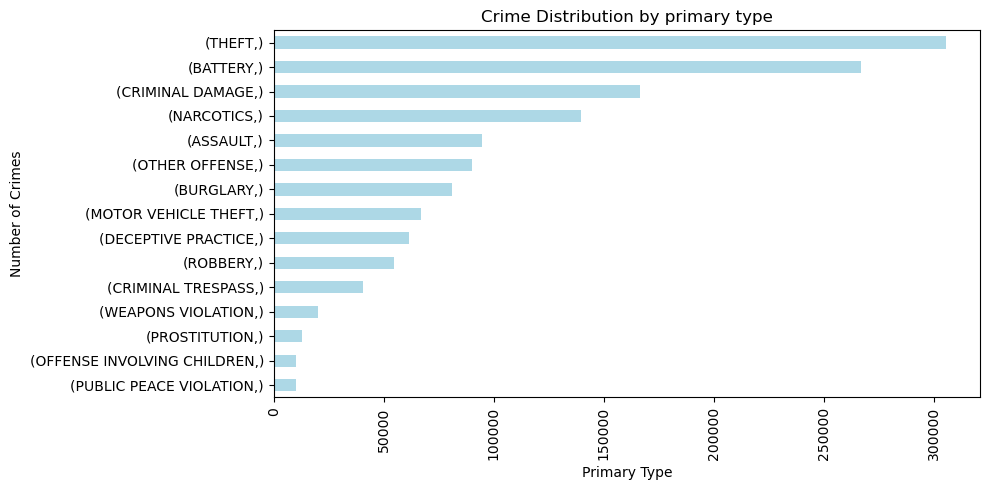

In [23]:
# Patterns in types of crime?
crime_distribution = chicago_df1[["Primary Type"]].value_counts().head(15).sort_values(ascending =True)

plt.figure(figsize=(10, 5))
crime_distribution.plot(kind='barh', color='lightblue')
plt.title('Crime Distribution by primary type')
plt.xlabel('Primary Type')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show() 

In [24]:
# Number of Narcotics arrest by location distribution
chicago_df1[chicago_df1['Primary Type'] == 'NARCOTICS']['Location Description'].value_counts()

Location Description
STREET                            48315
SIDEWALK                          45012
ALLEY                              9082
RESIDENCE                          5135
VEHICLE NON-COMMERCIAL             4159
                                  ...  
BOAT/WATERCRAFT                       1
CTA TRACKS - RIGHT OF WAY             1
HIGHWAY / EXPRESSWAY                  1
POOL ROOM                             1
AIRPORT EXTERIOR - SECURE AREA        1
Name: count, Length: 114, dtype: int64

In [25]:
# Filtered df that shows only rows where arrest is true
chicago_df1[chicago_df1['Arrest'] == True] 

,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Updated On,Location
0,HS401321,07/08/2010 11:38:00 PM,056XX S GREEN ST,141A,WEAPONS VIOLATION,UNLAWFUL USE HANDGUN,STREET,True,False,712,7.0,20.0,68.0,15,2010,02/10/2018 03:50:01 PM,"(41.79155006, -87.646300555)"
3,HN595456,09/18/2007 01:56:00 AM,087XX S COMMERCIAL AVE,1220,DECEPTIVE PRACTICE,THEFT OF LOST/MISLAID PROP,SIDEWALK,True,False,423,4.0,10.0,46.0,11,2007,02/28/2018 03:56:25 PM,"(41.736664051, -87.551415568)"
5,HK224824,03/07/2004 01:12:04 AM,025XX E 87TH ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,VEHICLE NON-COMMERCIAL,True,False,423,4.0,7.0,46.0,08B,2004,02/28/2018 03:56:25 PM,"(41.737250273, -87.561814019)"
8,HS485740,08/27/2010 11:45:00 PM,012XX N PULASKI RD,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,SIDEWALK,True,False,2534,25.0,27.0,23.0,18,2010,02/10/2018 03:50:01 PM,"(41.902899152, -87.72630861)"
21,HW170526,02/25/2013 10:18:00 PM,034XX W FOSTER AVE,2027,NARCOTICS,POSS: CRACK,VEHICLE NON-COMMERCIAL,True,False,1712,17.0,39.0,13.0,18,2013,02/10/2018 03:50:01 PM,"(41.975686466, -87.7139048)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595057,HS675288,12/24/2010 04:45:00 PM,039XX S ASHLAND AVE,0890,THEFT,FROM BUILDING,PARKING LOT/GARAGE(NON.RESID.),True,False,921,9.0,11.0,61.0,06,2010,02/09/2018 03:44:29 PM,"(41.822549711, -87.665424905)"
1595062,HJ429519,06/14/2003 10:10:57 PM,014XX W 13TH ST,1350,CRIMINAL TRESPASS,TO STATE SUP LAND,CHA HALLWAY/STAIRWELL/ELEVATOR,True,False,1231,12.0,2.0,28.0,26,2003,02/28/2018 03:56:25 PM,"(41.865132942, -87.662687356)"
1595066,HR206863,03/09/2009 06:15:00 PM,045XX N WESTERN AVE,502P,OTHER OFFENSE,FALSE/STOLEN/ALTERED TRP,STREET,True,False,1911,19.0,47.0,4.0,26,2009,02/28/2018 03:56:25 PM,"(41.96357226, -87.688747261)"
1595078,JC513428,11/16/2019 11:30:00 PM,011XX W LAWRENCE AVE,0460,BATTERY,SIMPLE,MOVIE HOUSE/THEATER,True,False,2033,20.0,46.0,3.0,08B,2019,11/23/2019 03:51:46 PM,"(41.969046206, -87.658064717)"


In [26]:
pip install scipy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


<Axes: xlabel='Location Description'>

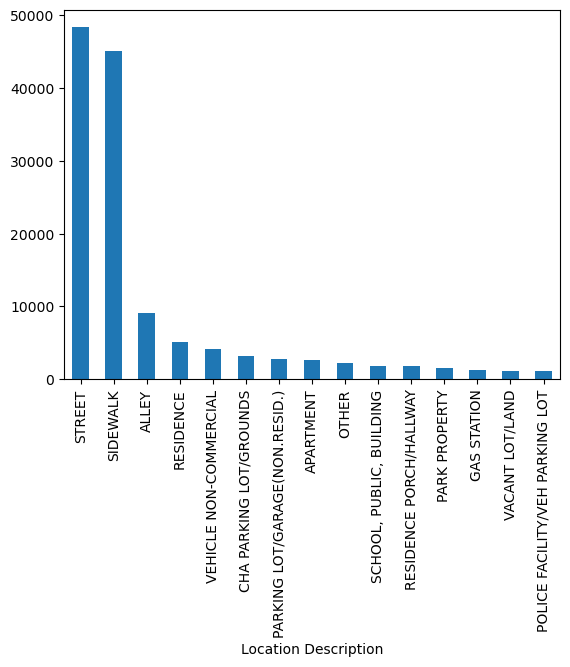

In [27]:
# Frequency distribution for the 10 most frequent locations for narcotics arrest
chicago_df1[chicago_df1['Primary Type'] == 'NARCOTICS']['Location Description'].value_counts()[:15].plot.bar()

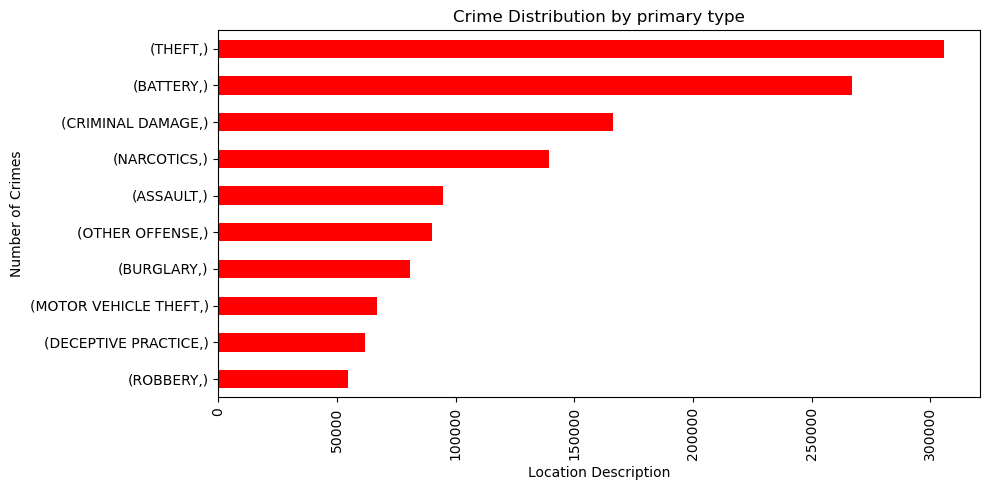

In [28]:
# Bar chart showing crime distribution by primary type
crime_distribution = chicago_df1[["Primary Type"]].value_counts().head(10).sort_values(ascending =True)

plt.figure(figsize=(10, 5))
crime_distribution.plot(kind='barh', color='red')
plt.title('Crime Distribution by primary type')
plt.xlabel('Location Description')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Text(0, 0.5, 'counts')

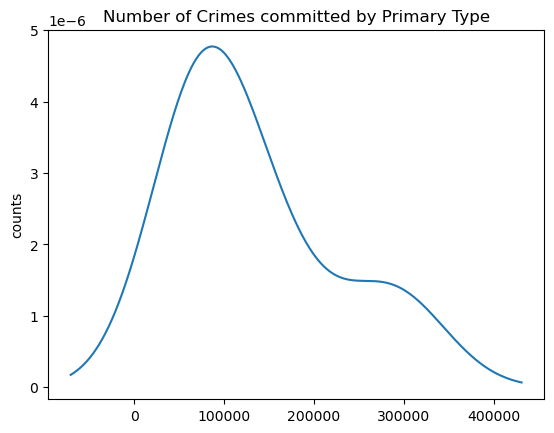

In [29]:
# Distribution of the top 10 primary types of crimes in the Chicago crime
ax = chicago_df1[["Primary Type"]].value_counts().head(10).plot(kind = "kde", title = "Number of Crimes committed by Primary Type")
ax.set_ylabel("counts")

In [30]:
# Feature Relationships

In [31]:
import seaborn as sns
#sns.scatterplot(x= "Primary Type", y= "Location Description", hue = "Block" , data = chicago_df1)

In [32]:
# Functions to create new columns for day,month and season 
def extract_date_time(dataset, date):
    date_extract = pd.to_datetime(dataset[date], format='%m/%d/%Y %I:%M:%S %p')
    month_to_season = {
        1: 'Winter', 2: 'Winter', 3: 'Spring',
        4: 'Spring', 5: 'Spring', 6: 'Summer',
        7: 'Summer', 8: 'Summer', 9: 'Fall',
        10: 'Fall', 11: 'Fall', 12: 'Winter'
    }

    dataset['Day'] = date_extract.dt.day_name()
    dataset['Month'] = date_extract.dt.month_name()
    dataset['Season'] = date_extract.dt.month.map(month_to_season)
    return dataset['Day'], dataset['Month'], dataset['Season']

In [33]:
date_time = extract_date_time(chicago_df1,"Date") # running the 'extract date' function
chicago_df1.head(3)

,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Updated On,Location,Day,Month,Season
0,HS401321,07/08/2010 11:38:00 PM,056XX S GREEN ST,141A,WEAPONS VIOLATION,UNLAWFUL USE HANDGUN,STREET,True,False,712,7.0,20.0,68.0,15,2010,02/10/2018 03:50:01 PM,"(41.79155006, -87.646300555)",Thursday,July,Summer
1,HH578795,08/13/2002 09:30:00 PM,077XX S RIDGELAND AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,414,4.0,8.0,43.0,14,2002,02/28/2018 03:56:25 PM,"(41.754268012, -87.582155675)",Tuesday,August,Summer
2,HY460862,10/13/2015 07:30:00 PM,067XX S ARTESIAN AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,832,8.0,15.0,66.0,08B,2015,02/10/2018 03:50:01 PM,"(41.770962966, -87.684637876)",Tuesday,October,Fall


In [34]:
#How does the frequency of crime vary over time? (daily, weekly, monthly, yearly)
crime_by_day2 = chicago_df1.groupby(['Day']).size().sort_values(ascending=False) #by day
crime_by_day2

Day
Friday       217477
Wednesday    208410
Saturday     207765
Tuesday      207363
Thursday     206120
Monday       204463
Sunday       197908
dtype: int64

In [35]:
crime_by_month2 = chicago_df1.groupby(['Month']).size().sort_values(ascending=False) #by month
crime_by_month2

Month
July         138577
August       133819
June         133621
May          133489
October      126087
September    125096
April        116571
March        115129
November     113791
January      108758
December     108336
February      96232
dtype: int64

In [36]:
crime_by_season2 = chicago_df1.groupby(['Season']).size().sort_values(ascending=False) #by season
crime_by_season2

Season
Summer    406017
Spring    365189
Fall      364974
Winter    313326
dtype: int64

Text(0, 0.5, 'counts')

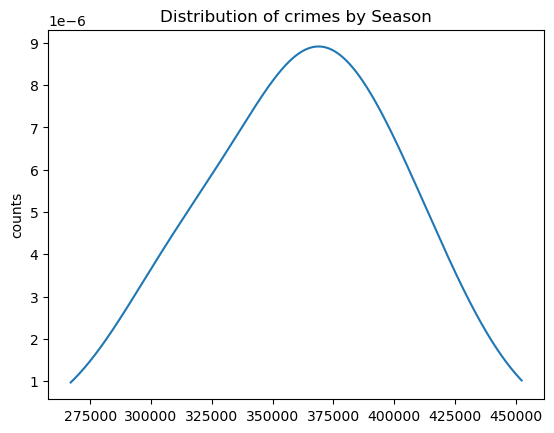

In [37]:
# Distribution of crimes by season in the crime_by_season2 dataset
ax = crime_by_season2.plot(kind = "kde", title = "Distribution of crimes by Season")
ax.set_ylabel("counts") 

In [38]:
# Crimes that occurs the most by day of the week
crime_by_day1 = chicago_df1.groupby(["Day", "Primary Type"]).size().sort_values(ascending= False)
crime_by_day1.head(5)

Day        Primary Type
Friday     THEFT           46986
Tuesday    THEFT           44496
Wednesday  THEFT           44320
Sunday     BATTERY         44270
Monday     THEFT           44055
dtype: int64

In [39]:
# Crimes that occurs the most by month
crime_by_month1 = chicago_df1.groupby(["Month", "Primary Type"]).size().sort_values(ascending= False)
crime_by_month1.head(5)

Month      Primary Type
July       THEFT           30469
August     THEFT           29842
June       THEFT           28069
October    THEFT           27336
September  THEFT           27149
dtype: int64

In [40]:
# Crimes that occurs the most by season
crime_by_season1 = chicago_df1.groupby(["Season", "Primary Type"]).size().sort_values(ascending= False)
crime_by_season1.head(5)

Season  Primary Type
Summer  THEFT           88380
Fall    THEFT           79229
Summer  BATTERY         77655
Spring  THEFT           72882
        BATTERY         70014
dtype: int64

In [41]:
## How does the frequency of crime vary over time by primary type? (daily, weekly, monthly, yearly)
def crime_count_by_day_for_primary_type(df, primary_type):
    filtered_df = df[df["Primary Type"] == primary_type]
    crime_by_day = filtered_df.groupby(["Primary Type", "Day"]).size().sort_values(ascending= False)
    return crime_by_day

def crime_count_by_month_for_primary_type(df, primary_type):
    filtered_df = df[df["Primary Type"] == primary_type]
    crime_by_month = filtered_df.groupby(["Primary Type", "Month"]).size().sort_values(ascending= False)
    return crime_by_month

def crime_count_by_season_for_primary_type(df, primary_type):
    filtered_df = df[df["Primary Type"] == primary_type]
    crime_by_season = filtered_df.groupby(["Primary Type", "Season"]).size().sort_values(ascending= False)
    return crime_by_season 

def crime_count_by_year_for_primary_type(df, primary_type):
    filtered_df = df[df["Primary Type"] == primary_type]
    crime_by_year = filtered_df.groupby(["Primary Type", "Year"]).size().sort_values(ascending= False)
    return crime_by_year

In [42]:
# Function to check the day of the week for the highest occurrence of crime for different crimes
crime_by_day_theft = crime_count_by_day_for_primary_type(chicago_df1, "THEFT")
print(crime_by_day_theft)

Primary Type  Day      
THEFT         Friday       46986
              Tuesday      44496
              Wednesday    44320
              Monday       44055
              Thursday     43789
              Saturday     43567
              Sunday       38402
dtype: int64


In [43]:
# Function to check the month with the highest occurrence of crime for different crimes
crime_by_month_theft = crime_count_by_month_for_primary_type(chicago_df1, "BURGLARY")
print(crime_by_month_theft)

Primary Type  Month    
BURGLARY      August       7815
              July         7678
              October      7632
              September    7285
              June         7274
              May          7170
              November     7023
              December     6812
              January      6053
              April        5819
              March        5558
              February     4762
dtype: int64


In [44]:
# Check the day of the week for the highest occurrence of crime for different crimes
crime_by_season_theft = crime_count_by_season_for_primary_type(chicago_df1, "BATTERY")
print(crime_by_season_theft)

Primary Type  Season
BATTERY       Summer    77655
              Spring    70014
              Fall      64934
              Winter    54302
dtype: int64


In [45]:
crime_by_year_theft = crime_count_by_year_for_primary_type(chicago_df1, "THEFT") ## Check the year for the highest occurrence of crime for different crimes
print(crime_by_year_theft)

Primary Type  Year
THEFT         2003    20637
              2004    19969
              2008    18024
              2006    17913
              2005    17766
              2007    17667
              2009    16514
              2010    15976
              2011    15756
              2012    15526
              2002    15074
              2013    14902
              2018    13381
              2017    13365
              2019    13037
              2016    12953
              2014    12804
              2015    11740
              2021     8297
              2020     8262
              2022     5784
              2001      268
dtype: int64


In [46]:
crime_by_year_homicide = crime_count_by_year_for_primary_type(chicago_df1, "HOMICIDE").head()
print(crime_by_year_homicide)

Primary Type  Year
HOMICIDE      2020    186
              2021    169
              2016    168
              2018    131
              2017    125
dtype: int64


In [47]:
crime_by_day_narcotics = crime_count_by_year_for_primary_type(chicago_df1, "NARCOTICS").head()
print(crime_by_day_narcotics)

Primary Type  Year
NARCOTICS     2004    11897
              2005    11873
              2006    11526
              2007    11376
              2003    11267
dtype: int64


In [48]:
# Where are the high-crime areas in Chicago?
crime_by_location = chicago_df1.groupby(['Location Description']).size().sort_values(ascending=False)
crime_by_location
#Are certain types of crime more prevalent in specific neighborhoods or districts?

Location Description
STREET                 371650
RESIDENCE              240037
APARTMENT              167644
SIDEWALK               142320
OTHER                   50554
                        ...  
CTA SUBWAY STATION          1
POOLROOM                    1
CLEANERS/LAUNDROMAT         1
TRAILER                     1
SEWER                       1
Length: 190, dtype: int64

In [49]:
#Types of crime more prevalent in specific neighborhoods
type_crime_by_location = chicago_df1.groupby(["Location Description", "Primary Type"]).size().sort_values(ascending= False)
type_crime_by_location.head(10)

Location Description  Primary Type       
STREET                THEFT                  82384
                      CRIMINAL DAMAGE        59394
APARTMENT             BATTERY                57704
RESIDENCE             BATTERY                53909
STREET                MOTOR VEHICLE THEFT    52341
                      NARCOTICS              48315
SIDEWALK              NARCOTICS              45012
STREET                BATTERY                44538
SIDEWALK              BATTERY                39726
RESIDENCE             OTHER OFFENSE          38941
dtype: int64

In [50]:
# Functions to understand types of crime more prevalent in specific neighborhoods
def crime_count_by_primary_type_for_location(df, location_description):
    filtered_df = df[df["Location Description"] == location_description]
    crime_by_location = filtered_df.groupby(["Location Description", "Primary Type"]).size().sort_values(ascending= False)
    return crime_by_location
crime_count_by_primary_type_for_location(chicago_df1, "STREET")

Location Description  Primary Type                     
STREET                THEFT                                82384
                      CRIMINAL DAMAGE                      59394
                      MOTOR VEHICLE THEFT                  52341
                      NARCOTICS                            48315
                      BATTERY                              44538
                      ASSAULT                              19036
                      ROBBERY                              16633
                      OTHER OFFENSE                        15562
                      PROSTITUTION                         10517
                      WEAPONS VIOLATION                     7389
                      DECEPTIVE PRACTICE                    4119
                      PUBLIC PEACE VIOLATION                3093
                      CRIMINAL TRESPASS                     2081
                      INTERFERENCE WITH PUBLIC OFFICER      1837
                      HOMICIDE    

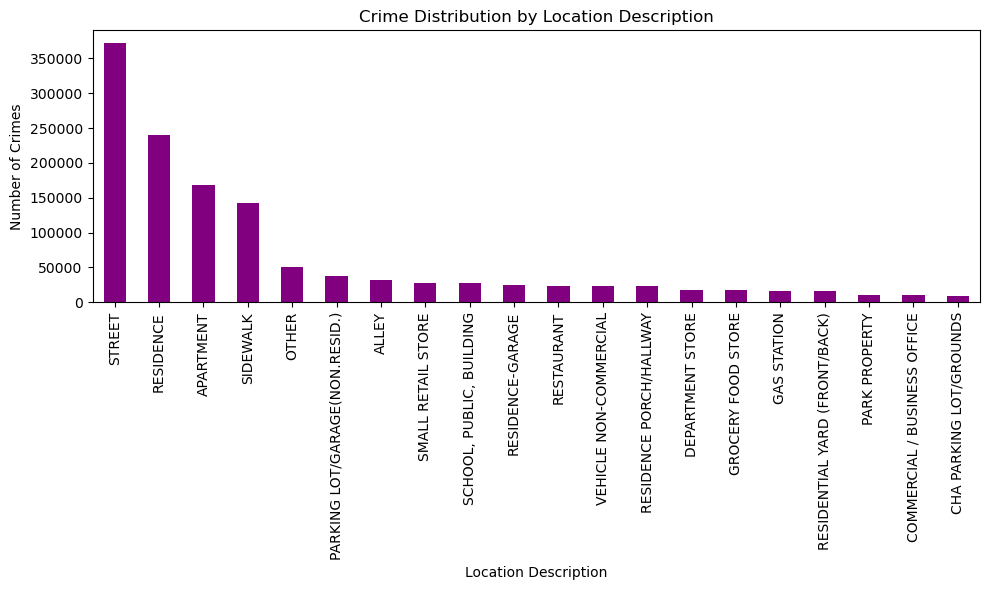

In [51]:
# Plot the crime distribution across different locations
crime_distribution_by_location = chicago_df1['Location Description'].value_counts()

plt.figure(figsize=(10, 6))
crime_distribution_by_location.head(20).plot(kind='bar', color='purple')
plt.title('Crime Distribution by Location Description')
plt.xlabel('Location Description')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [52]:
# Statistics

In [53]:
# What percentage of reported crimes result in arrests?
arrest_rate = chicago_df1['Arrest'].mean()
arrest_rate

0.2623321324644396

In [54]:
type_crime_by_location = chicago_df1.groupby(["Location Description", "Arrest"]).size().sort_values(ascending= False)
type_crime_by_location.head(10) # areas where arrest are prevailent

Location Description            Arrest
STREET                          False     270146
RESIDENCE                       False     208143
APARTMENT                       False     140597
STREET                          True      101504
SIDEWALK                        False      71633
                                True       70687
OTHER                           False      41448
RESIDENCE                       True       31894
PARKING LOT/GARAGE(NON.RESID.)  False      30553
APARTMENT                       True       27047
dtype: int64

In [55]:
#Are there any patterns in clearance rates for different types of crime? 
## Clearance rate refers to the percentage of reported crimes that are "cleared" by law enforcement. A crime is considered 
# "cleared" when at least one arrest is made or when the case is closed through exceptional means, such as death.

clearance_rates = chicago_df1.groupby('Primary Type')['Arrest'].mean().sort_values(ascending=False)
clearance_rates.head(10)

Primary Type
PUBLIC INDECENCY                     1.000000
PROSTITUTION                         0.995304
NARCOTICS                            0.993848
GAMBLING                             0.992484
LIQUOR LAW VIOLATION                 0.991144
CONCEALED CARRY LICENSE VIOLATION    0.980296
INTERFERENCE WITH PUBLIC OFFICER     0.927911
WEAPONS VIOLATION                    0.747220
OBSCENITY                            0.718519
CRIMINAL TRESPASS                    0.698327
Name: Arrest, dtype: float64

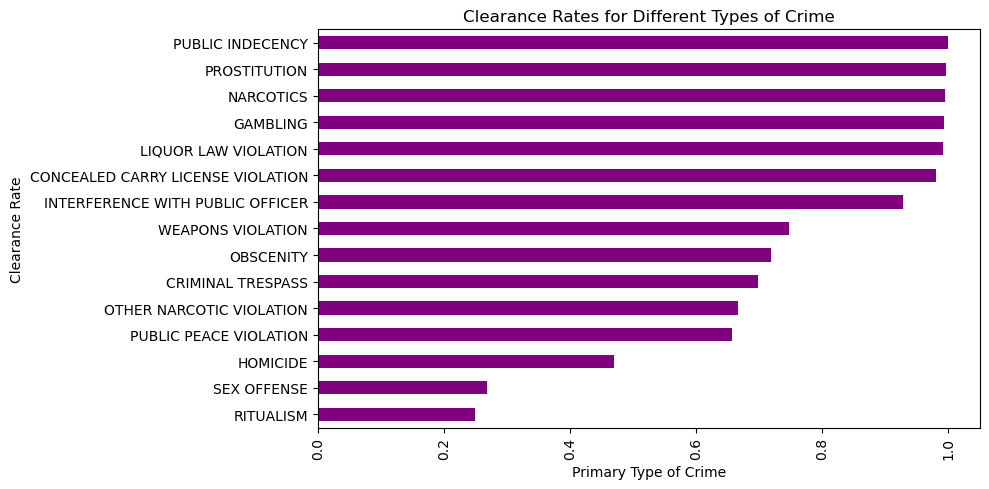

In [56]:
# Plot the clearance rates for different types of crime
clearance_rates = chicago_df1.groupby('Primary Type')['Arrest'].mean().sort_values(ascending=False).head(15)

plt.figure(figsize=(10, 5))
clearance_rates.sort_values().plot(kind='barh', color='purple')
plt.title('Clearance Rates for Different Types of Crime')
plt.xlabel('Primary Type of Crime')
plt.ylabel('Clearance Rate')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [57]:
# What percentage of reported crimes are domestic?
domestic_rate = chicago_df1["Domestic"].mean()
domestic_rate

0.13925985818616826

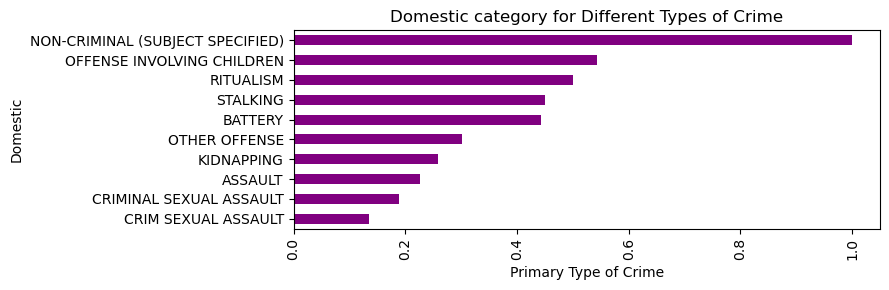

In [58]:
clearance_rates = chicago_df1.groupby('Primary Type')['Domestic'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(9, 3))
clearance_rates.sort_values().plot(kind='barh', color='purple')
plt.title('Domestic category for Different Types of Crime')
plt.xlabel('Primary Type of Crime')
plt.ylabel('Domestic')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [59]:
# What crime description are common in Chicago?
crime_by_description = chicago_df1.groupby(['Description']).size().sort_values(ascending=False)
crime_by_description.head(10)

Description
SIMPLE                          160377
DOMESTIC BATTERY SIMPLE         124514
$500 AND UNDER                  111906
TO VEHICLE                       80533
TO PROPERTY                      76569
OVER $500                        74078
FORCIBLE ENTRY                   54000
AUTOMOBILE                       53639
POSS: CANNABIS 30GMS OR LESS     53612
FROM BUILDING                    52212
dtype: int64

In [60]:
# District with highest and lowest crime rates
crime_by_district = chicago_df1.groupby(['District']).size().sort_values(ascending=False)

highest_crime_district = crime_by_district.idxmax()
highest_crime_count = crime_by_district.max()

lowest_crime_district = crime_by_district.idxmin()
lowest_crime_count = crime_by_district.min()

print(f"Highest crime district:\n{highest_crime_district} : {highest_crime_count}")
print(f"Lowest crime district:\n{lowest_crime_district} : {lowest_crime_count}")

Highest crime district:
8.0 : 98773
Lowest crime district:
31.0 : 29


In [61]:
# Ward with highest and lowest crime rates
crime_by_ward = chicago_df1.groupby(['Ward']).size().sort_values(ascending=False)

highest_crime_ward = crime_by_ward.idxmax()
highest_wardcrime_count = crime_by_ward.max()

lowest_crime_ward = crime_by_ward.idxmin()
lowest_wardcrime_count = crime_by_ward.min()

print(f"Highest crime Ward:\n{highest_crime_ward} : {highest_wardcrime_count}")
print(f"Lowest crime Ward:\n{lowest_crime_ward} : {lowest_wardcrime_count}")

Highest crime Ward:
28.0 : 66766
Lowest crime Ward:
19.0 : 13081


In [62]:
# Community Area with highest and lowest crime rates
crime_by_comarea= chicago_df1.groupby(['Community Area']).size().sort_values(ascending=False)

highest_crime_comarea = crime_by_comarea.idxmax()
highest_comcrime_count = crime_by_comarea.max()

lowest_crime_comarea = crime_by_comarea.idxmin()
lowest_comcrime_count = crime_by_comarea.min()

print(f"Highest crime Community Area:\n{highest_crime_comarea} : {highest_comcrime_count}")
print(f"Lowest crime Community Area:\n{lowest_crime_comarea} : {lowest_comcrime_count}")

Highest crime Community Area:
25.0 : 91261
Lowest crime Community Area:
0.0 : 10


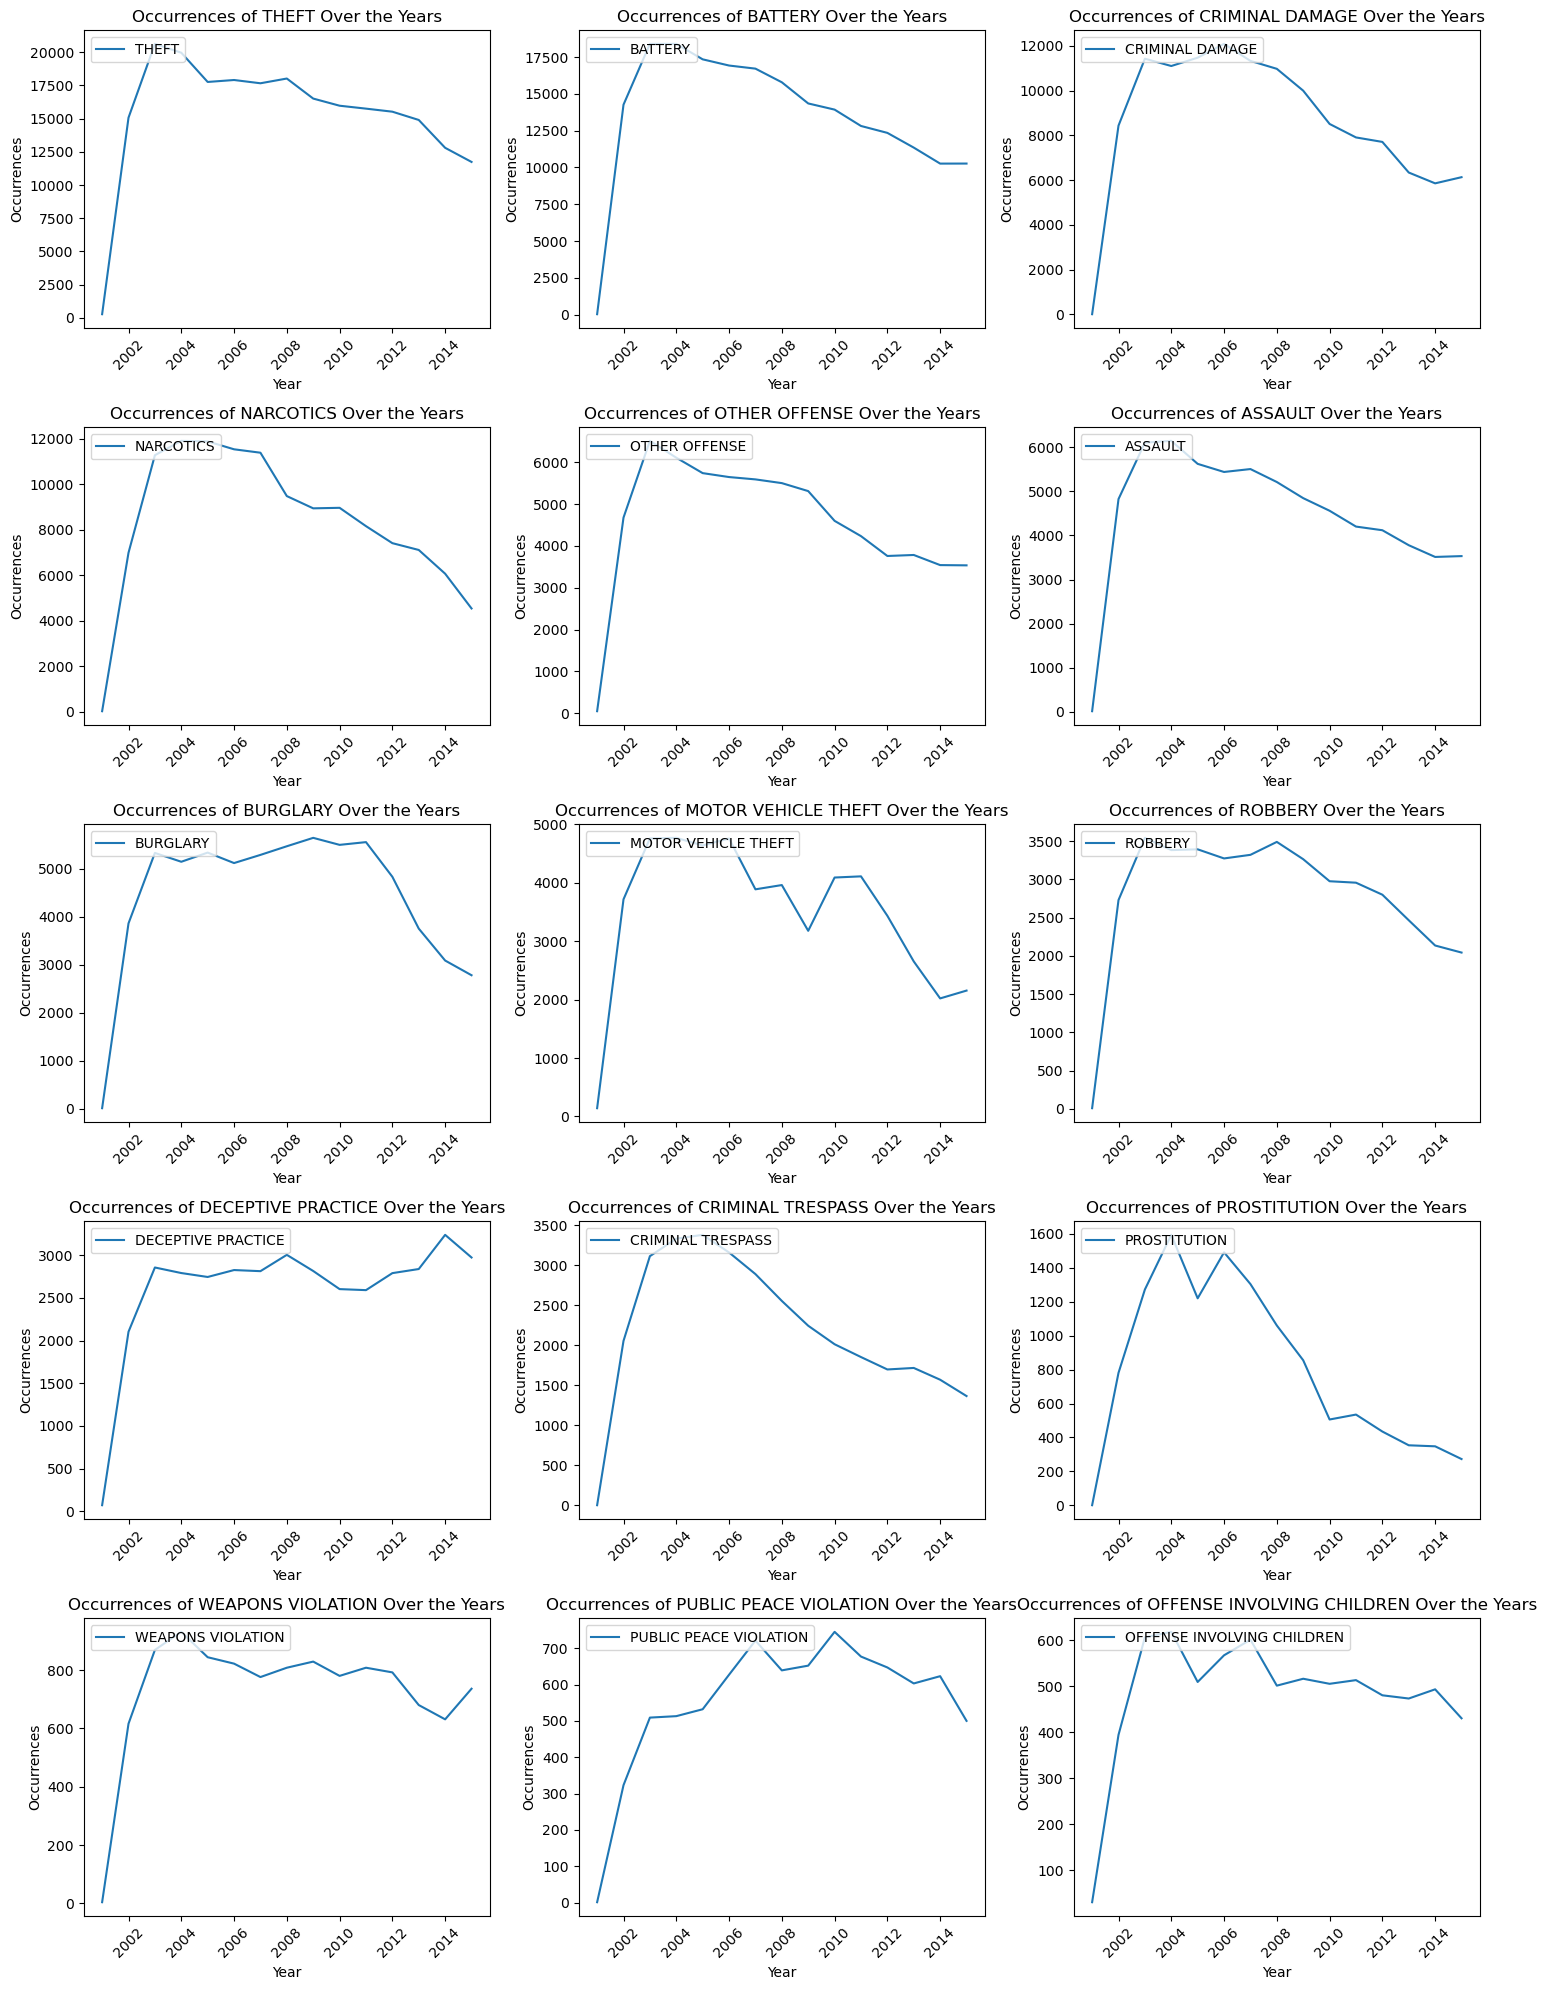

In [63]:
# Did the Types of crime change as years go by? if yes/no. let the data show the insight.
crime_by_year = chicago_df1.groupby(["Year","Primary Type"]).size().unstack().head(15)
top_types = crime_by_year.sum().nlargest(15).index

crime_by_year = crime_by_year[top_types]

fig, axes = plt.subplots(5, 3, figsize=(15, 20))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over each crime category and plot in the corresponding subplot
for i, crime in enumerate(crime_by_year.columns):
    sns.lineplot(data=crime_by_year[crime], ax=axes[i])
    axes[i].set_title(f'Occurrences of {crime} Over the Years')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Occurrences')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend([crime], loc='upper left')

# Adjust layout
plt.tight_layout()
plt.show()